# NBA Trends
In this project, you’ll analyze data from the NBA (National Basketball Association) and explore possible associations.

This data was originally sourced from 538’s Analysis of the Complete History Of The NBA and contains the original, unmodified data from Basketball Reference as well as several additional variables 538 added to perform their own analysis.

You can read more about the data and how it’s being used by 538 here. For this project we’ve limited the data to just 5 teams and 10 columns (plus one constructed column, `point_diff`, the difference between `pts` and `opp_pts`).

You will create several charts and tables in this project, so you’ll need to use `plt.clf()` between plots in your code so that the plots don’t layer on top of one another.

In [1]:
# Load libraries
import numpy as np
import pandas as pd
from scipy.stats import pearsonr, chi2_contingency
import matplotlib.pyplot as plt
import seaborn as sns

# Import data
np.set_printoptions(suppress=True, precision = 2)
nba = pd.read_csv('nba_games.csv')

# Subset Data to 2010 Season, 2014 Season
nba_2010 = nba[nba.year_id == 2010]
nba_2014 = nba[nba.year_id == 2014]

print(nba_2010.head())
print(nba_2014.head())

            game_id  year_id  fran_id      opp_fran game_location  \
21717  200910270CLE     2010  Celtics     Cavaliers             A   
21718  200910280BOS     2010  Celtics       Hornets             H   
21719  200910280MIA     2010   Knicks          Heat             A   
21720  200910280MIN     2010     Nets  Timberwolves             A   
21721  200910280OKC     2010  Thunder         Kings             H   

       is_playoffs  pts  opp_pts game_result  forecast  point_diff  
21717            0   95       89           W  0.277472           6  
21718            0   92       59           W  0.814619          33  
21719            0   93      115           L  0.258755         -22  
21720            0   93       95           L  0.475155          -2  
21721            0  102       89           W  0.716764          13  
            game_id  year_id  fran_id   opp_fran game_location  is_playoffs  \
23468  201310300CLE     2014     Nets  Cavaliers             A            0   
23469  201310

## Analyzing relationships between Quant and Categorical

1. Above, the data has been subsetted for you into two smaller datasets: games from 2010 (named `nba_2010`) and games from 2014 (named `nba_2014`). To start, let’s focus on the 2010 data.

Suppose you want to compare the knicks to the nets with respect to points earned per game. Using the `pts` column from the `nba_2010` DataFrame, create two series named `knicks_pts` (`fran_id = "Knicks"`) and `nets_pts`(`fran_id = "Nets"`) that represent the points each team has scored in their games.

In [3]:
knicks_pts = nba_2010.pts[nba_2010.fran_id == 'Knicks']
nets_pts = nba_2010.pts[nba_2010.fran_id == 'Nets']

2. Calculate the difference between the two teams’ average points scored and save the result as `diff_means_2010`. Based on this value, do you think `fran_id` and `pts` are associated? Why or why not?

In [5]:
knicks_pts_mean = np.mean(knicks_pts)
nets_pts_mean = np.mean(nets_pts)
diff_means_2010 = knicks_pts_mean - nets_pts_mean
diff_means_2010

9.731707317073173

3. Rather than comparing means, it’s useful look at the full distribution of values to understand whether a difference in means is meaningful. Create a set of overlapping histograms that can be used to compare the points scored for the Knicks compared to the Nets. Use the series you created in the previous step (1) and the code below to create the plot. Do the distributions appear to be the same?

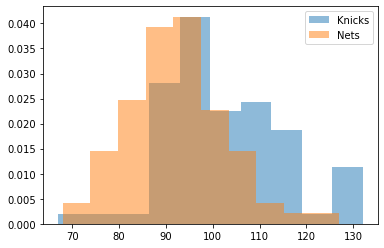

In [7]:
plt.hist(knicks_pts, alpha=0.5, density=True, label = 'Knicks')
plt.hist(nets_pts, alpha=0.5, density=True, label = 'Nets')
plt.legend()
plt.show()

4. Now, let’s compare the 2010 games to 2014. Replicate the steps from the previous three exercises using `nba_2014`. First, calculate the mean difference between the two teams points scored. Save and print the value as `diff_means_2014`. Did the difference in points get larger or smaller in 2014? Then, plot the overlapping histograms. Does the mean difference you calculated make sense?

In [8]:
knicks_pts_14 = nba_2014.pts[nba_2014.fran_id == 'Knicks']
nets_pts_14 = nba_2014.pts[nba_2014.fran_id == 'Nets']
knicks_pts_14_mean = np.mean(knicks_pts_14)
nets_pts_14_mean = np.mean(nets_pts_14)
diff_means_2014 = knicks_pts_14_mean - nets_pts_14_mean
diff_means_2014

0.44706798131809933

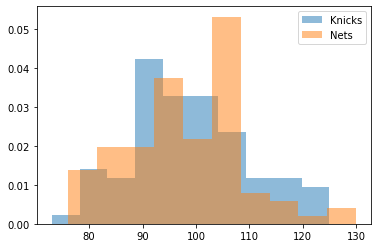

In [10]:
plt.clf()
plt.hist(knicks_pts_14, alpha=0.5, density=True, label = 'Knicks')
plt.hist(nets_pts_14, alpha=0.5, density=True, label = 'Nets')
plt.legend()
plt.show()

5. For the remainder of this project, we’ll focus on data from 2010. Let’s now include all teams in the dataset and investigate the relationship between franchise and points scored per game.

Using `nba_2010`, generate side-by-side boxplots with points scored (`pts`) on the y-axis and team (`fran_id`) on the x-axis. Is there any overlap between the boxes? Does this chart suggest that `fran_id` and `pts` are associated? Which pairs of teams, if any, earn different average scores per game?

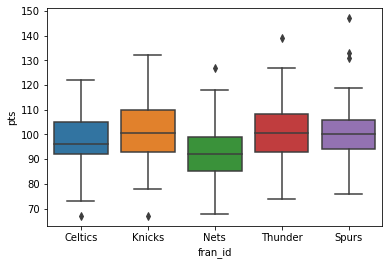

In [13]:
plt.clf()
sns.boxplot(data=nba_2010, x='fran_id', y='pts')
plt.show()

**Nets and Celtics earned different average scores per game**

## Analyzing relationships between Categorical variables


6. The variable `game_result` indicates whether a team won a particular game (`'W'` stands for “win” and `'L'` stands for “loss”). The variable `game_location` indicates whether a team was playing at home or away (`'H'` stands for “home” and `'A'` stands for “away”). Do teams tend to win more games at home compared to away?

Data scientists will often calculate a contingency table of frequencies to help them determine if categorical variables are associated. Calculate a table of frequencies that shows the counts of `game_result` and `game_location`.

Save your result as `location_result_freq` and print your result. Based on this table, do you think the variables are associated?

In [14]:
location_result_freq = pd.crosstab(nba_2010.game_result, nba_2010.game_location)
location_result_freq

game_location,A,H
game_result,,
L,133,105
W,92,120


**Based on this result, the results is quite associated with the location. We can see that there's significant loses in the aways' games and quite higher wins in the homes' games.**

7. Convert this table of frequencies to a table of proportions and save the result as `location_result_proportions`. Print your result.

In [15]:
location_result_proportions = location_result_freq/len(nba_2010)
location_result_proportions

game_location,A,H
game_result,,
L,0.295556,0.233333
W,0.204444,0.266667


8. Using the contingency table created in the previous exercise (Ex. 7), calculate the expected contingency table (if there were no association) and the Chi-Square statistic and print your results. Does the actual contingency table look similar to the expected table — or different? Based on this output, do you think there is an association between these variables?

In [19]:
chi2, pval, dof, expected = chi2_contingency(location_result_freq)
print(expected)
print(chi2)

[[119. 119.]
 [106. 106.]]
6.501704455367053


**Yes there is an association between the variables since the Chi squared is larger than 4**

## Analyzing Relationships Between Quantitative Variables


9. For each game, 538 has calculated the probability that each team will win the game. In the data, this is saved as `forecast`. The `point_diff` column gives the margin of victory/defeat for each team (positive values mean that the team won; negative values mean that they lost). Did teams with a higher probability of winning (according to 538) also tend to win games by more points?

Using `nba_2010`, calculate the covariance between `forecast` (538’s projected win probability) and `point_diff` (the margin of victory/defeat) in the dataset. Save and print your result. Looking at the matrix, what is the covariance between these two variables?

In [20]:
covariance = np.cov(nba_2010.forecast, nba_2010.point_diff)
print(covariance)

[[  0.05   1.37]
 [  1.37 186.56]]


**The covariance between these two variables is 1.37**

10. Using `nba_2010`, calculate the correlation between `forecast` and `point_diff`. Save and print your result. Does this value suggest an association between the two variables?

In [21]:
corr_forecast_pointdiff, p = pearsonr(nba_2010.forecast, nba_2010.point_diff)
print(corr_forecast_pointdiff)

0.44020887084680815


**Yes, the variables are positively correlation with each other linearly**

11. Generate a scatter plot of `forecast` (on the x-axis) and `point_diff` (on the y-axis). Does the correlation value make sense?

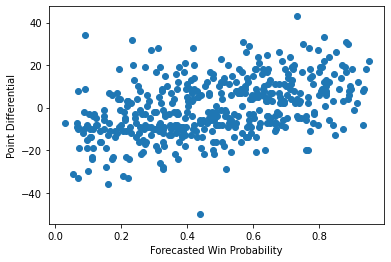

In [23]:
plt.clf()
plt.scatter(data=nba_2010, x='forecast', y='point_diff')
plt.xlabel('Forecasted Win Probability')
plt.ylabel('Point Differential')
plt.show()